In [1]:
import sys
print(sys.executable)


C:\Users\HP\anaconda3\python.exe


In [2]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
print(tf.__version__)


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


2.20.0


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [23]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU =", len(gpus))

if len(gpus) > 0:
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("No GPU found. Using CPU.")


Number of GPU = 0
No GPU found. Using CPU.


In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


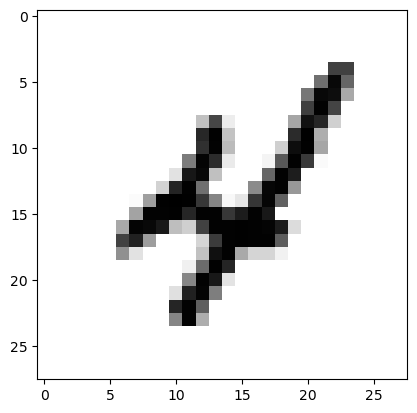

In [26]:
digit = 9
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

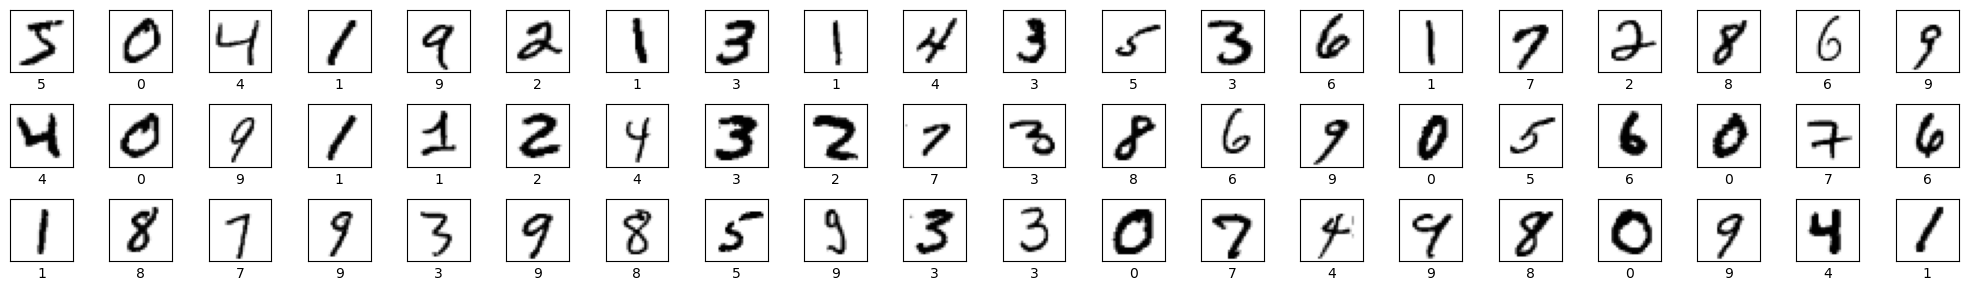

In [27]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [28]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#9): Which is digit '4'


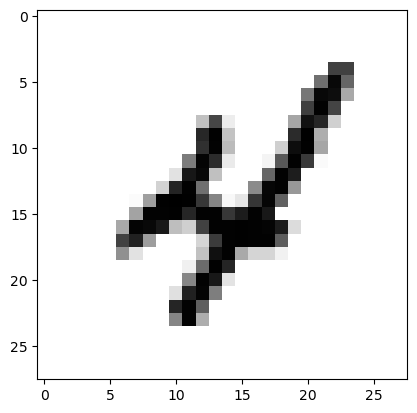

In [30]:
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [31]:
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [33]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9213 - loss: 0.2731 - val_accuracy: 0.9571 - val_loss: 0.1452
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9697 - loss: 0.1024 - val_accuracy: 0.9630 - val_loss: 0.1235
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9789 - loss: 0.0660 - val_accuracy: 0.9704 - val_loss: 0.1029
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9717 - val_loss: 0.0965
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9889 - loss: 0.0336 - val_accuracy: 0.9738 - val_loss: 0.0946


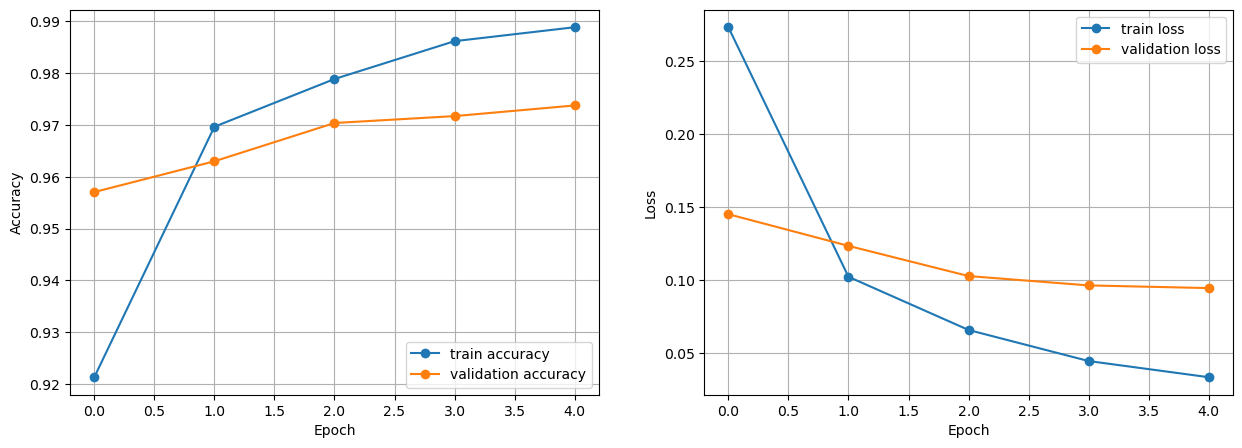

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0788

Test accuracy: 0.9765999913215637


In [36]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


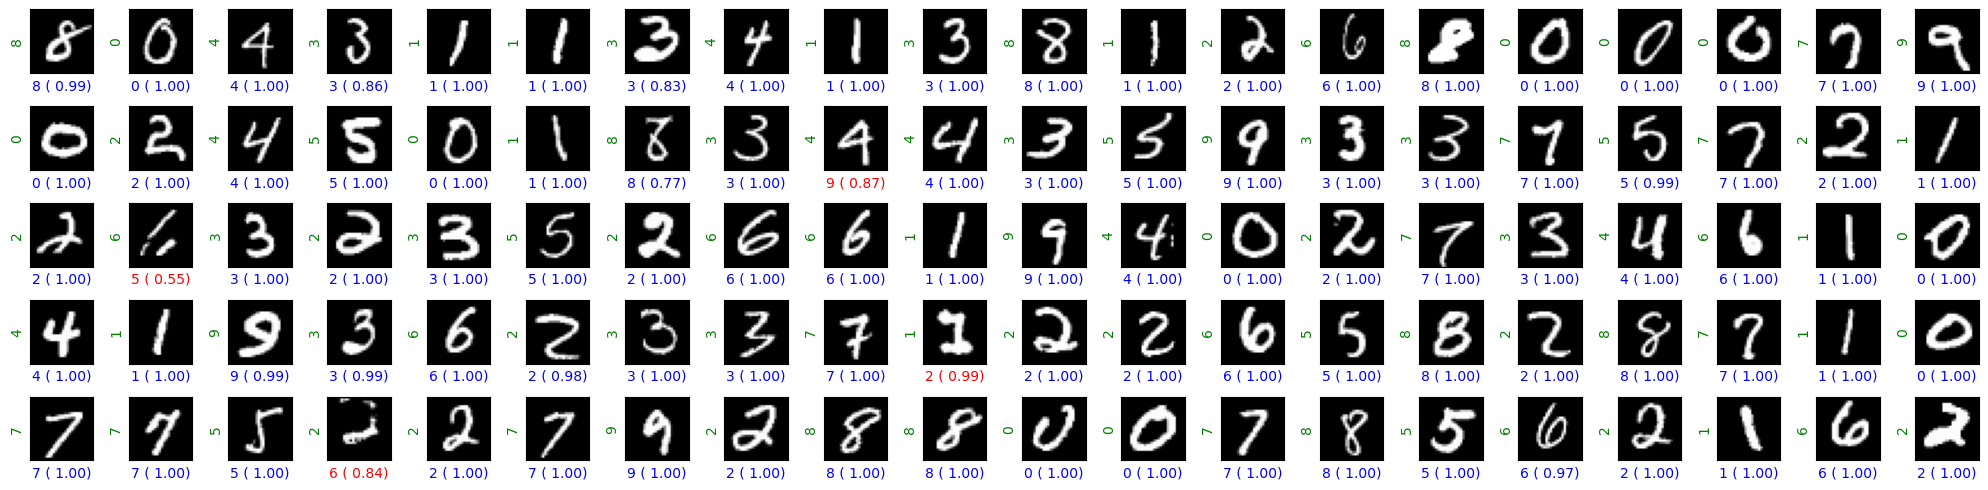

In [37]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [38]:
def test(i):
    img = x_test[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions) 
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_4
Received: inputs=('Tensor(shape=(1, 784))',)
  warnings.warn(msg)


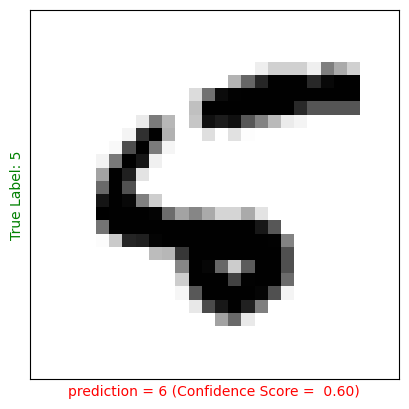

In [39]:
test(8)

In [26]:
%pip install opencv-python


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -------------------- ------------------- 6.6/12.6 MB 36.9 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.6 MB 35.7 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 31.1 MB/s  0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.5

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-2.3.5:
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-2.3.5
   

In [40]:
import cv2
print(cv2.__version__)


4.12.0


In [42]:
# Webcam digit recognition using your trained MNIST model
# Press 'q' to quit

import cv2
import numpy as np

def preprocess_for_mnist(roi_bgr):
    """
    Take a BGR ROI from webcam and convert to MNIST-like (1, 784) float32 array in [0,1].
    Returns (x_input, debug_threshold_image) or (None, debug_threshold_image) if no digit found.
    """
    # 1) Convert to grayscale
    gray = cv2.cvtColor(roi_bgr, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # 2) Threshold: make digit WHITE on BLACK background (MNIST-like)
    th = cv2.adaptiveThreshold(
        gray, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        11, 2
    )

    # 3) Find contours (digit candidates)
    cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not cnts:
        return None, th

    # Take biggest contour = most likely the digit
    c = max(cnts, key=cv2.contourArea)
    area = cv2.contourArea(c)
    if area < 80:  # too small -> probably noise
        return None, th

    x, y, w, h = cv2.boundingRect(c)
    digit = th[y:y+h, x:x+w]

    # 4) Make it square by padding, then resize to 28x28
    size = max(w, h)
    pad_x = (size - w) // 2
    pad_y = (size - h) // 2
    digit = cv2.copyMakeBorder(
        digit,
        pad_y, size - h - pad_y,
        pad_x, size - w - pad_x,
        cv2.BORDER_CONSTANT, value=0
    )
    digit = cv2.resize(digit, (28, 28), interpolation=cv2.INTER_AREA)

    # 5) Normalize to [0,1] and flatten to (1,784)
    x_input = digit.astype("float32") / 255.0
    x_input = x_input.reshape(1, 784)
    return x_input, th


# ---------- MAIN WEBCAM LOOP ----------
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise RuntimeError("Camera not found. Try changing VideoCapture(0) to (1) or check permissions.")

print("Webcam started. Put your paper digit inside the BLUE box. Press 'q' to quit.")

while True:
    ok, frame = cap.read()
    if not ok:
        break

    H, W = frame.shape[:2]

    # Blue box ROI where you will show the digit (you can adjust if you want)
    x1, y1 = int(W * 0.55), int(H * 0.20)
    x2, y2 = int(W * 0.95), int(H * 0.60)

    roi = frame[y1:y2, x1:x2].copy()

    x_input, th = preprocess_for_mnist(roi)

    pred_text = "No digit"
    if x_input is not None:
        probs = model.predict(x_input, verbose=0)[0]   # (10,)
        pred = int(np.argmax(probs))
        conf = float(np.max(probs))
        pred_text = f"{pred}  (conf={conf:.2f})"

    # Draw ROI rectangle and prediction text
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(frame, "Show digit inside BLUE box", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    cv2.putText(frame, f"Pred: {pred_text}", (10, 65),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Show camera
    cv2.imshow("MNIST Webcam Digit", frame)

    # OPTIONAL: show threshold debug window (helps if detection fails)
    cv2.imshow("Threshold (debug)", th)

    # Quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Webcam started. Put your paper digit inside the BLUE box. Press 'q' to quit.
